In [1]:
!pip install optgbm

In [2]:
import time
import datetime

import numpy as np
import pandas as pd
import optgbm as lgb

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
print(datetime.datetime.now())
start = time.time()

X_train = train_df.drop(['id', 'target', 'feature_18'], 1)
y_train = train_df['feature_18']

lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)

minutes = (time.time() - start) / 60
print(round(minutes, 2))
print(datetime.datetime.now())

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classifier=False as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
[I 2021-06-27 22:47:17,797] A new study created in memory with name: no-name-037b9f51-462b-4e18-85fc-2469ad06fffa
Searching the best hyperparameters...


2021-06-27 22:47:17.770088


[I 2021-06-27 22:47:23,039] Trial 0 finished with value: 5.614004476190056 and parameters: {'feature_fraction': 0.2, 'max_depth': 6, 'num_leaves': 26, 'min_data_in_leaf': 45, 'lambda_l1': 1.0080393538670448e-08, 'lambda_l2': 0.6773827302322255, 'bagging_fraction': 0.75, 'bagging_freq': 1}. Best is trial 0 with value: 5.614004476190056.
[I 2021-06-27 22:47:32,153] Trial 1 finished with value: 5.610580850999464 and parameters: {'feature_fraction': 0.45000000000000007, 'max_depth': 4, 'num_leaves': 7, 'min_data_in_leaf': 4588, 'lambda_l1': 4.800858287100243, 'lambda_l2': 2.3479022142805217e-08, 'bagging_fraction': 0.8500000000000001, 'bagging_freq': 5}. Best is trial 1 with value: 5.610580850999464.
[I 2021-06-27 22:47:33,331] Trial 2 finished with value: 9.282887085500168 and parameters: {'feature_fraction': 0.6, 'max_depth': 4, 'num_leaves': 2, 'min_data_in_leaf': 67537, 'lambda_l1': 9.937831308219328e-09, 'lambda_l2': 0.0025913347691804787, 'bagging_fraction': 0.8500000000000001, 'bagg

[I 2021-06-27 22:50:15,906] Trial 23 finished with value: 5.608305625373882 and parameters: {'feature_fraction': 0.25, 'max_depth': 6, 'num_leaves': 38, 'min_data_in_leaf': 3491, 'lambda_l1': 1.1535888030638492e-07, 'lambda_l2': 9.403618917855728e-09, 'bagging_fraction': 0.75, 'bagging_freq': 6}. Best is trial 5 with value: 5.603452446009447.
[I 2021-06-27 22:50:22,466] Trial 24 finished with value: 5.617634260803852 and parameters: {'feature_fraction': 0.1, 'max_depth': 3, 'num_leaves': 5, 'min_data_in_leaf': 11998, 'lambda_l1': 0.008610581206937931, 'lambda_l2': 0.059465019072815095, 'bagging_fraction': 0.8, 'bagging_freq': 7}. Best is trial 5 with value: 5.603452446009447.
[I 2021-06-27 22:50:32,868] Trial 25 finished with value: 5.607882751489067 and parameters: {'feature_fraction': 0.2, 'max_depth': 5, 'num_leaves': 21, 'min_data_in_leaf': 5314, 'lambda_l1': 1.2067024045984644e-09, 'lambda_l2': 4.641270603339218e-07, 'bagging_fraction': 0.9, 'bagging_freq': 8}. Best is trial 5 wit

5.33
2021-06-27 22:52:37.396971


In [6]:
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lgbm.predict(X_train)

print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_pred))

print('R^2: %.2f'
      % r2_score(y_train, y_pred))

Mean squared error: 5.54
R^2: 0.15


<AxesSubplot:ylabel='feature_18'>

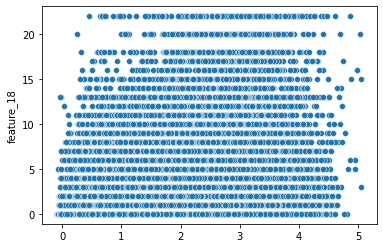

In [7]:
sns.scatterplot(x=y_pred, y=y_train)